In [51]:
from dataclasses import replace
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.special import entr
from sklearn.metrics import accuracy_score
import operator
from sklearn.metrics import confusion_matrix
from Plots import PlotConfMatrix

In [52]:
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

# load the data
iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

In [53]:
# use PCA to reduce the dimensions for visualization
pca = PCA(n_components=2)
transformed_iris = pca.fit_transform(X=X_raw)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

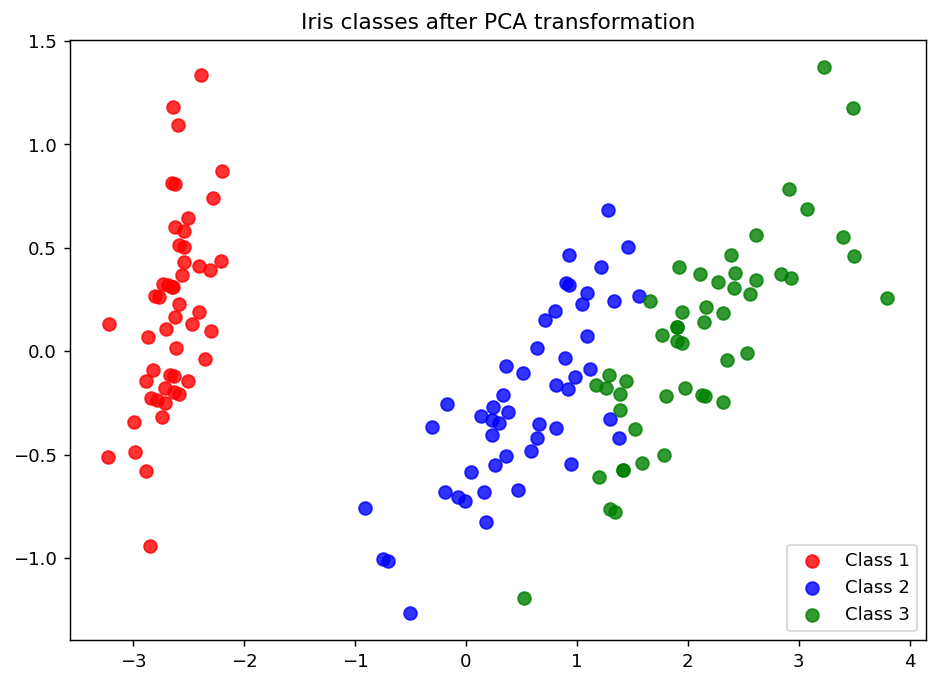

In [54]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component[y_raw==0], y_component[y_raw==0], color='red',s=50, alpha=8/10, label='Class 1')
plt.scatter(x_component[y_raw==1], y_component[y_raw==1], color='blue',s=50, alpha=8/10, label='Class 2')
plt.scatter(x_component[y_raw==2], y_component[y_raw==2], color='green',s=50, alpha=8/10, label='Class 3')
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
plt.gca().legend(loc="lower right")
#plt.legend(loc="upper left")
plt.title('Iris classes after PCA transformation')
plt.savefig('OriginalIrisData.svg')
plt.savefig('OriginalIrisData.pdf')
plt.show()

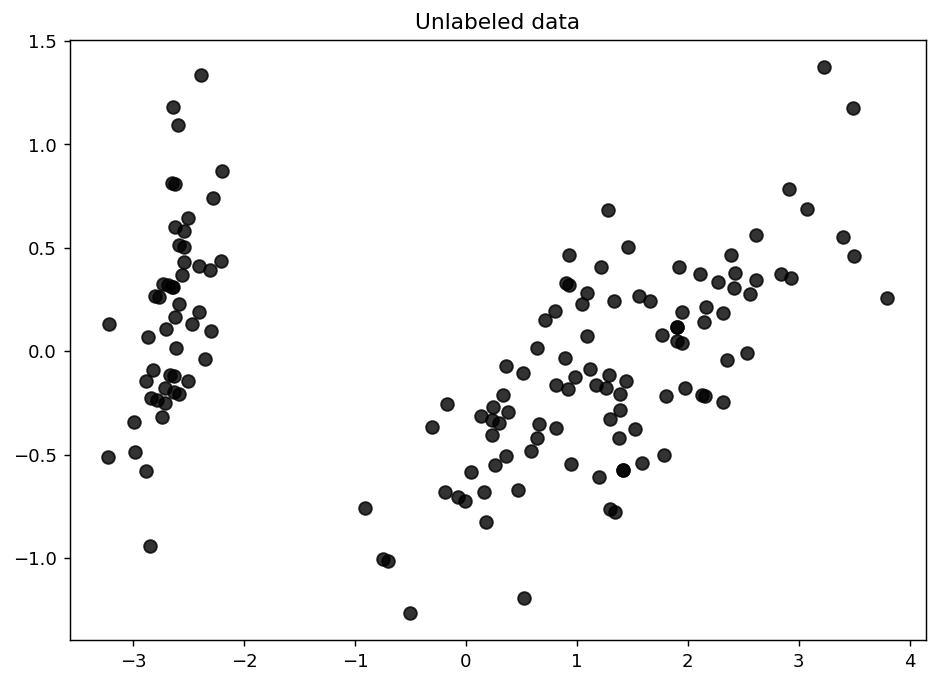

In [55]:
# plot data without labels (unlabeled data)
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='black',s=50, alpha=8/10, label='Class 1')
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.gca().legend(loc="lower right")
plt.title('Unlabeled data')
plt.savefig('OriginalIrisUnData.svg')
plt.savefig('OriginalIrisUnData.pdf')
plt.show()
n_labeled_examples = X_raw.shape[0]

In [56]:
# pick three points randomly and make their labels available (initial training data)
training_indices=np.random.permutation(n_labeled_examples-1)[0:3]
print(training_indices)

# pick the initial training dtaa
X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

[ 72 112 131]


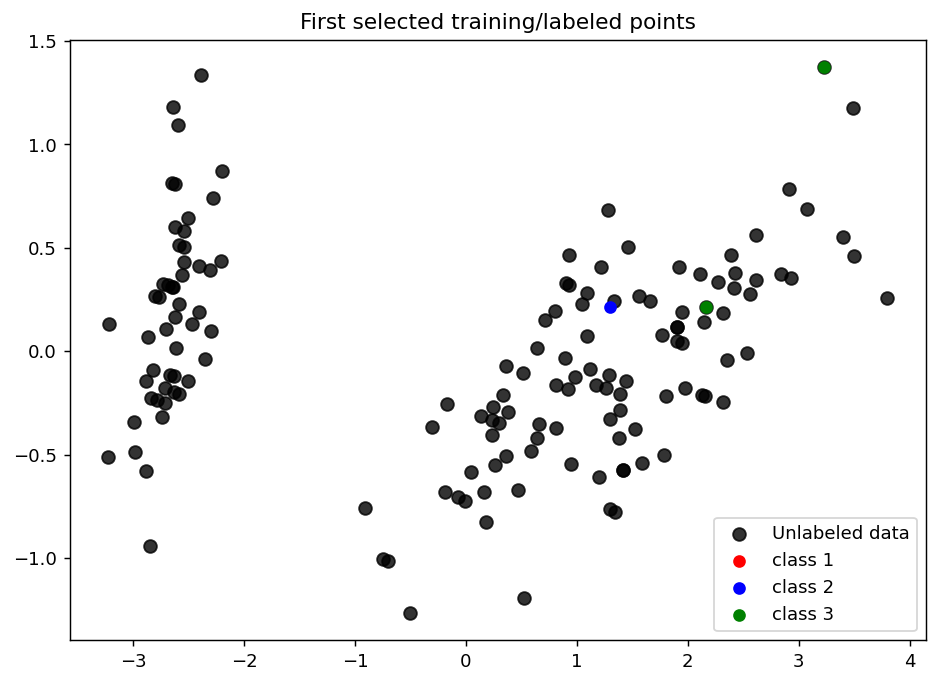

In [57]:
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='black',s=50, alpha=8/10, label='Unlabeled data')
#plt.scatter(x=x_component[training_indices], y=y_component[training_indices], color='yellow', cmap='viridis', marker='o')
for i in range(3):
    if i==0:
        plt.scatter(x=x_component[training_indices[y_train==i]], y=y_component[training_indices[y_train==i]], color='red', cmap='viridis', marker='o', label='class 1')
    elif i==1:
        plt.scatter(x=x_component[training_indices[y_train==i]], y=y_component[training_indices[i]], color='blue', cmap='viridis', marker='o', label='class 2')
    else:
        plt.scatter(x=x_component[training_indices[y_train==i]], y=y_component[training_indices[y_train==i]], color='green', cmap='viridis', marker='o', label='class 3')        
plt.title('First selected training/labeled points')
plt.legend()
plt.savefig('FirstSelectedData.svg')
plt.savefig('FirstSelectedData.pdf')
plt.show()

Predicted probabilities of the 1th instance is[0.53 0.47] with entropy: 0.6913460990017393
Predicted probabilities of the 2th instance is[0.63 0.37] with entropy: 0.6589556806830628
Predicted probabilities of the 3th instance is[0.53 0.47] with entropy: 0.6913460990017393
Predicted probabilities of the 4th instance is[0.63 0.37] with entropy: 0.6589556806830628
Predicted probabilities of the 5th instance is[0.53 0.47] with entropy: 0.6913460990017393
The most uncertain point is No. 110


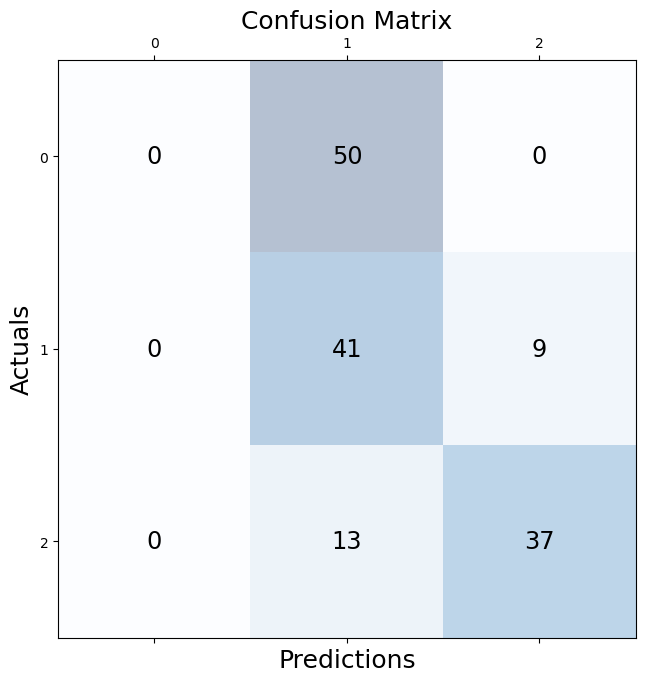

In [58]:
# use a learning model (Random Forest) to select one uncertain point
clf = RandomForestClassifier(max_depth = 4, min_samples_split=2, n_estimators = 200, random_state = 1) 
clf.fit(X_train, y_train) 
predictions = clf.predict(X_raw) 
#predictions = clf.predict(X_pool) 
unqueried_score= np.array(accuracy_score(predictions, y_raw))
#unqueried_score= np.array(accuracy_score(predictions, y_pool))
predicted_probs = clf.predict_proba(X_pool) 
entropy_array = entr(predicted_probs).sum(axis=1)
# print the prediction probabilities and entropies of the first five data points
for i in range(5):
    print('Predicted probabilities of the ' + str(i+1) + 'th instance is' + str(predicted_probs[i]) + ' with entropy: ' +str(entropy_array[i])) 
query_index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
print('The most uncertain point is No.', query_index)
conf_matrix=confusion_matrix(y_raw, predictions)
PlotConfMatrix(conf_matrix, 'Confusion_Matrix', 0) 

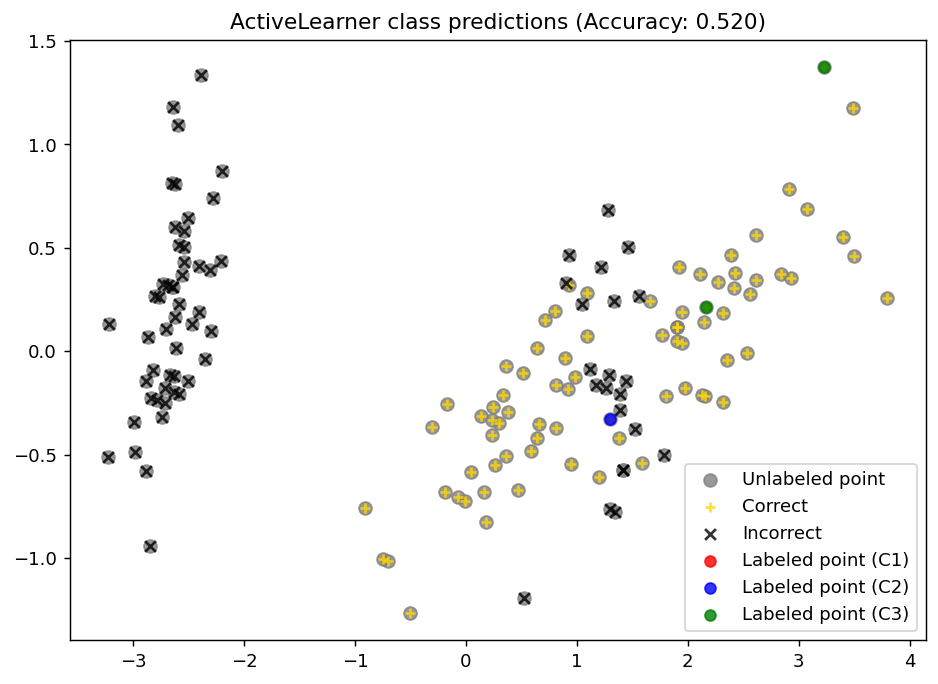

In [59]:
is_correct = (predictions == y_raw)
#is_correct = (predictions == y_pool)
# Plot our classification results.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='gray',s=50, alpha=8/10, label='Unlabeled point')
plt.scatter(x=x_component[is_correct],  y=y_component[is_correct],  color='gold', marker='+', label='Correct',   alpha=8/10)
plt.scatter(x=x_component[~is_correct], y=y_component[~is_correct], color='black', marker='x', label='Incorrect', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==0]], y=y_component[training_indices[y_raw[training_indices]==0]], c='red', marker='o', label='Labeled point (C1)', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==1]], y=y_component[training_indices[y_raw[training_indices]==1]], c='blue', marker='o', label='Labeled point (C2)', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==2]], y=y_component[training_indices[y_raw[training_indices]==2]], c='green', marker='o', label='Labeled point (C3)', alpha=8/10)
plt.title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.legend(loc='lower right')
plt.savefig('FirstSelectedPerformanec.svg')
plt.savefig('FirstSelectedPerformanec.pdf')
plt.show()

Predicted probabilities of the 1th instance is[0.51 0.49] with entropy: 0.6929471672244782
Predicted probabilities of the 2th instance is[0.535 0.465] with entropy: 0.6906951757946529
Predicted probabilities of the 3th instance is[0.51 0.49] with entropy: 0.6929471672244782
Predicted probabilities of the 4th instance is[0.535 0.465] with entropy: 0.6906951757946529
Predicted probabilities of the 5th instance is[0.51 0.49] with entropy: 0.6929471672244782
The most uncertain point is No. 0


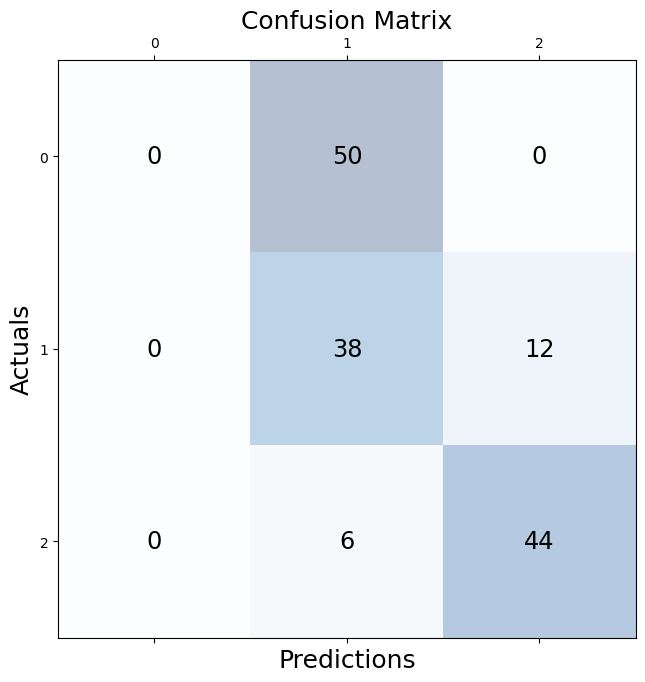

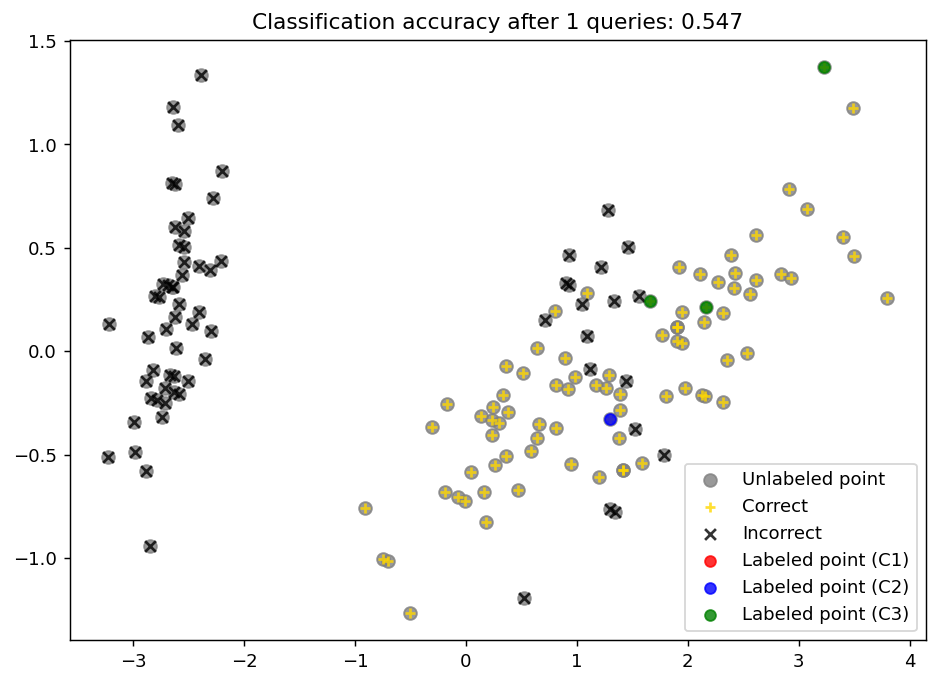

Accuracy after query 1: 0.5467
Predicted probabilities of the 1th instance is[0.545 0.285 0.17 ] with entropy: 0.9897818702155591
Predicted probabilities of the 2th instance is[0.61  0.215 0.175] with entropy: 0.937020593625987
Predicted probabilities of the 3th instance is[0.605 0.225 0.17 ] with entropy: 0.9408837370789389
Predicted probabilities of the 4th instance is[0.63 0.21 0.16] with entropy: 0.912031400881142
Predicted probabilities of the 5th instance is[0.615 0.21  0.175] with entropy: 0.9317274573938452
The most uncertain point is No. 13


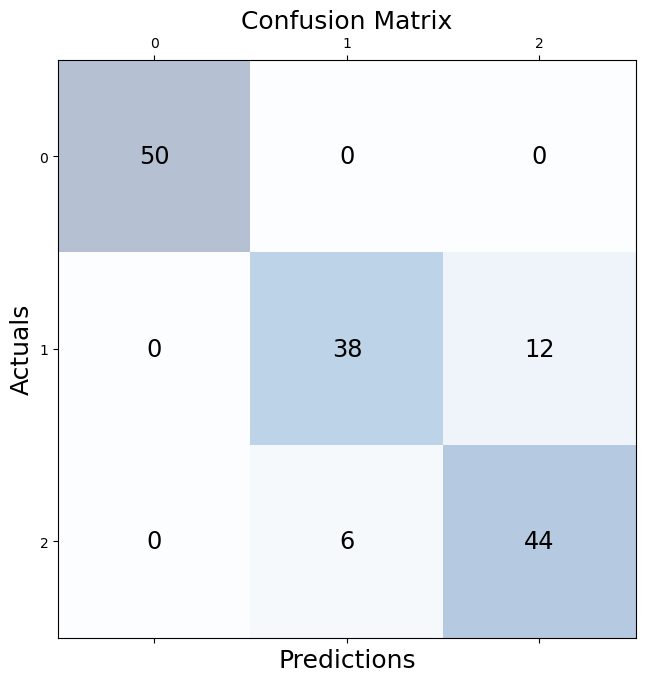

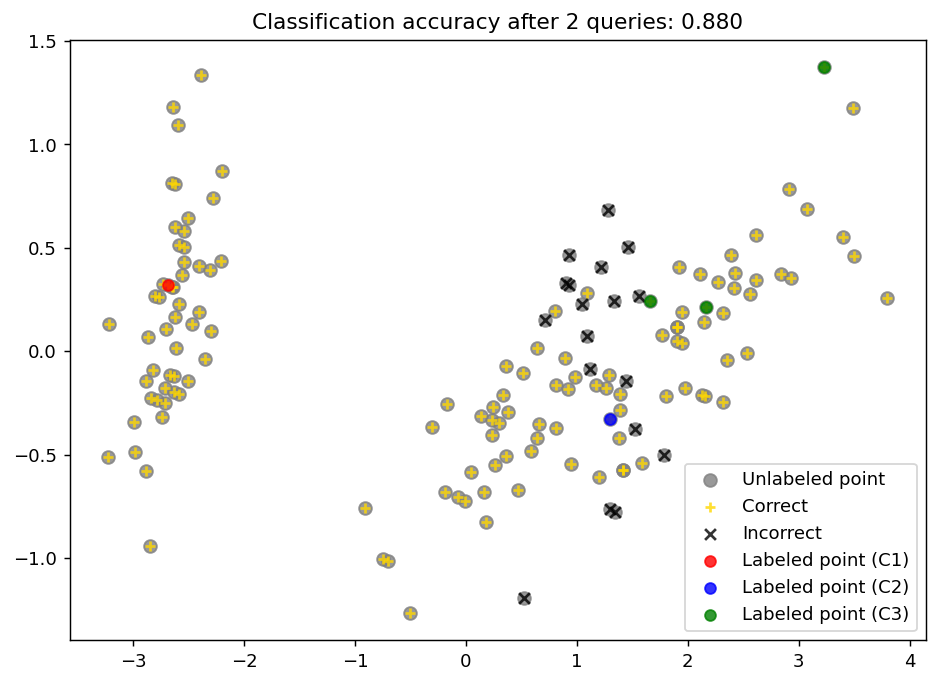

Accuracy after query 2: 0.8800
Predicted probabilities of the 1th instance is[0.72  0.195 0.085] with entropy: 0.7648341356132569
Predicted probabilities of the 2th instance is[0.795 0.125 0.08 ] with entropy: 0.644371949895245
Predicted probabilities of the 3th instance is[0.78  0.135 0.085] with entropy: 0.673668569738035
Predicted probabilities of the 4th instance is[0.86 0.08 0.06] with entropy: 0.5005706197220046
Predicted probabilities of the 5th instance is[0.895 0.08  0.025] with entropy: 0.39356402473052593
The most uncertain point is No. 82


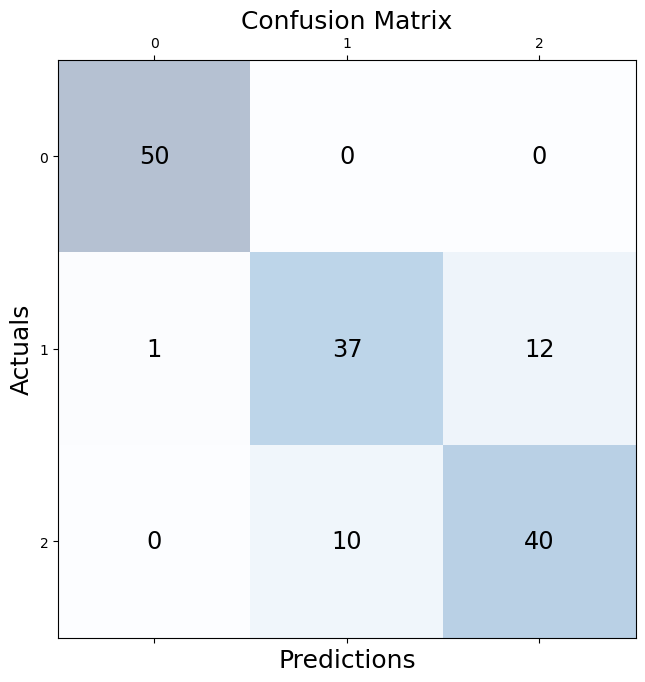

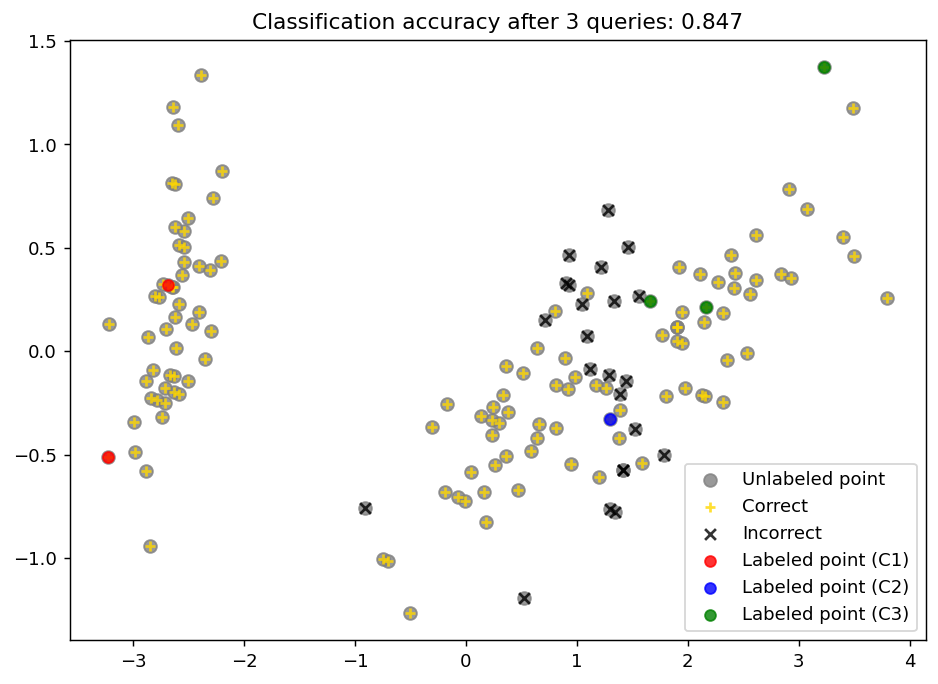

Accuracy after query 3: 0.8467
Predicted probabilities of the 1th instance is[0.725 0.25  0.025] with entropy: 0.6719437041252312
Predicted probabilities of the 2th instance is[0.735 0.24  0.025] with entropy: 0.6610252248369192
Predicted probabilities of the 3th instance is[0.735 0.24  0.025] with entropy: 0.6610252248369192
Predicted probabilities of the 4th instance is[0.85 0.14 0.01] with entropy: 0.4594485918251862
Predicted probabilities of the 5th instance is[0.9  0.09 0.01] with entropy: 0.35759127073059305
The most uncertain point is No. 108


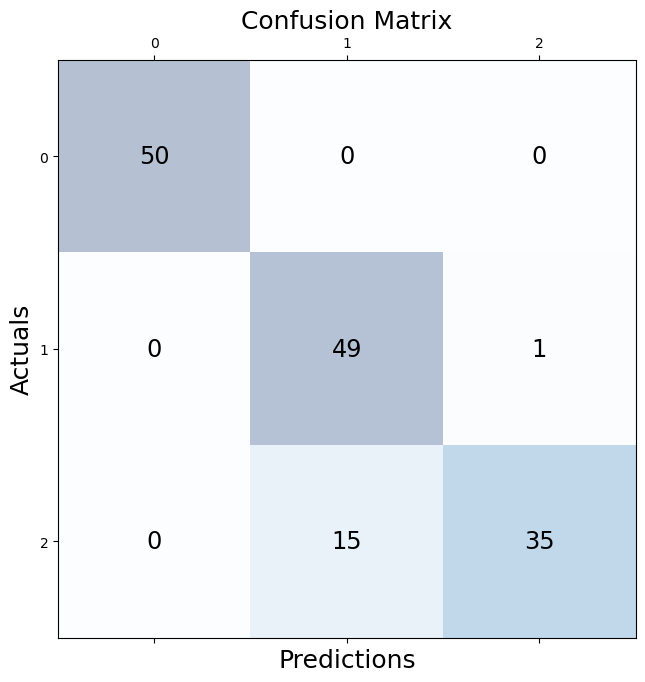

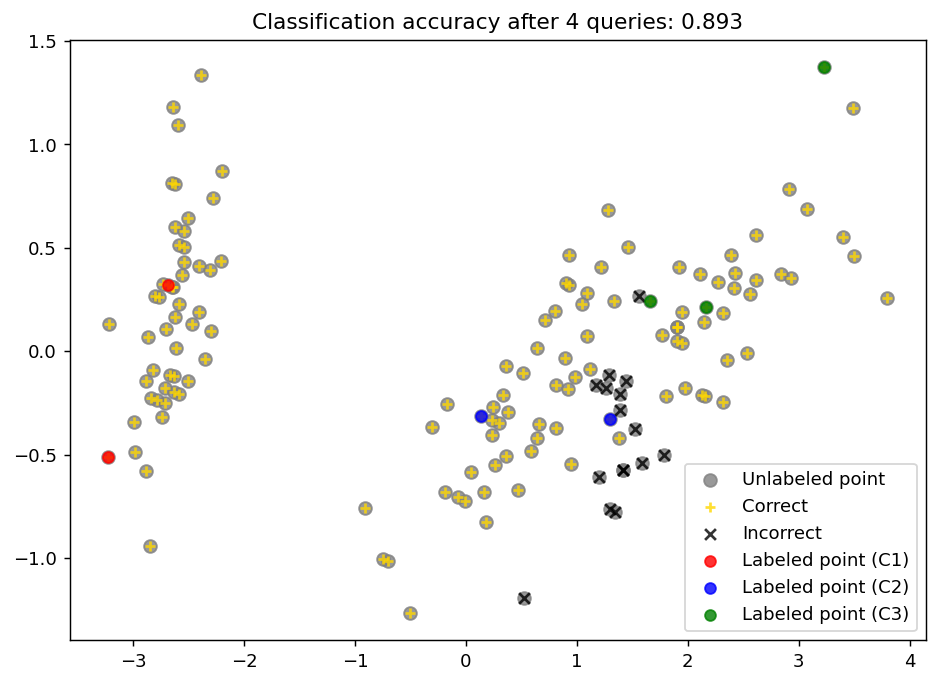

Accuracy after query 4: 0.8933
Predicted probabilities of the 1th instance is[0.655 0.295 0.05 ] with entropy: 0.7870603192493928
Predicted probabilities of the 2th instance is[0.69  0.265 0.045] with entropy: 0.7475098607181232
Predicted probabilities of the 3th instance is[0.685 0.265 0.05 ] with entropy: 0.7608738206147565
Predicted probabilities of the 4th instance is[0.82  0.165 0.015] with entropy: 0.5230239637602031
Predicted probabilities of the 5th instance is[0.885 0.1   0.015] with entropy: 0.40137244153477714
The most uncertain point is No. 102


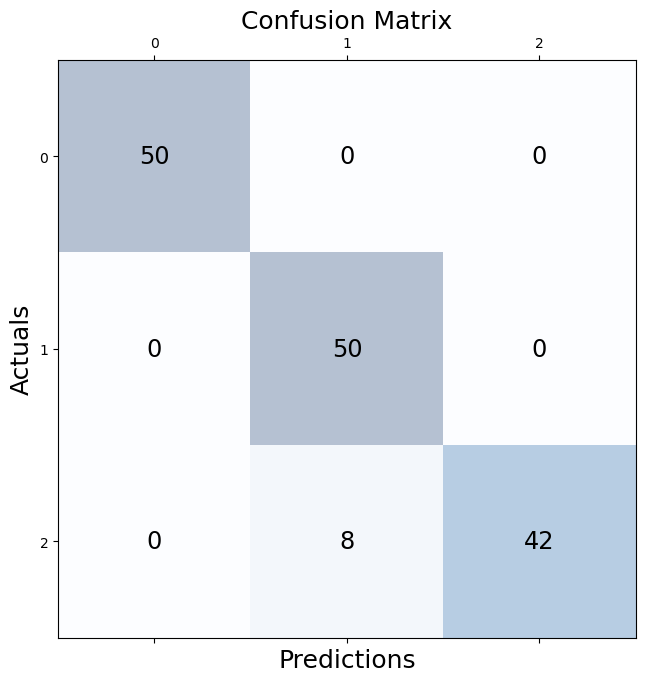

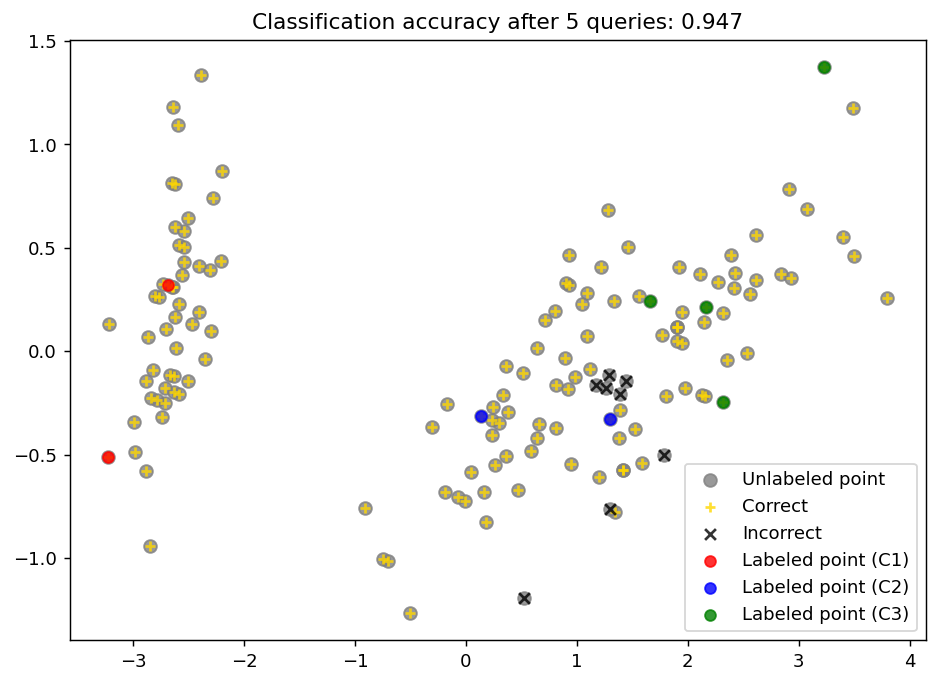

Accuracy after query 5: 0.9467
Predicted probabilities of the 1th instance is[0.59 0.23 0.18] with entropy: 0.9579925079987028
Predicted probabilities of the 2th instance is[0.64 0.23 0.13] with entropy: 0.8888779265041972
Predicted probabilities of the 3th instance is[0.61 0.23 0.16] with entropy: 0.9327592636203021
Predicted probabilities of the 4th instance is[0.79 0.15 0.06] with entropy: 0.6395932842201295
Predicted probabilities of the 5th instance is[0.87  0.085 0.045] with entropy: 0.4702410160064882
The most uncertain point is No. 94


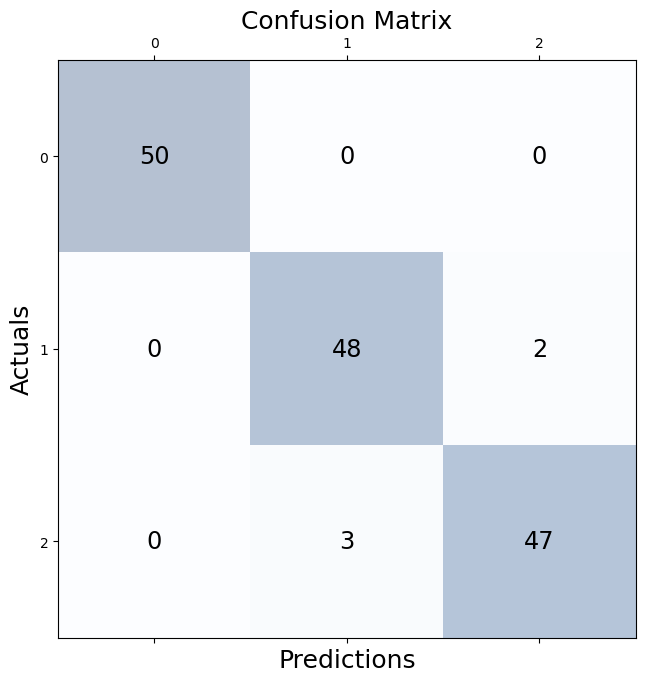

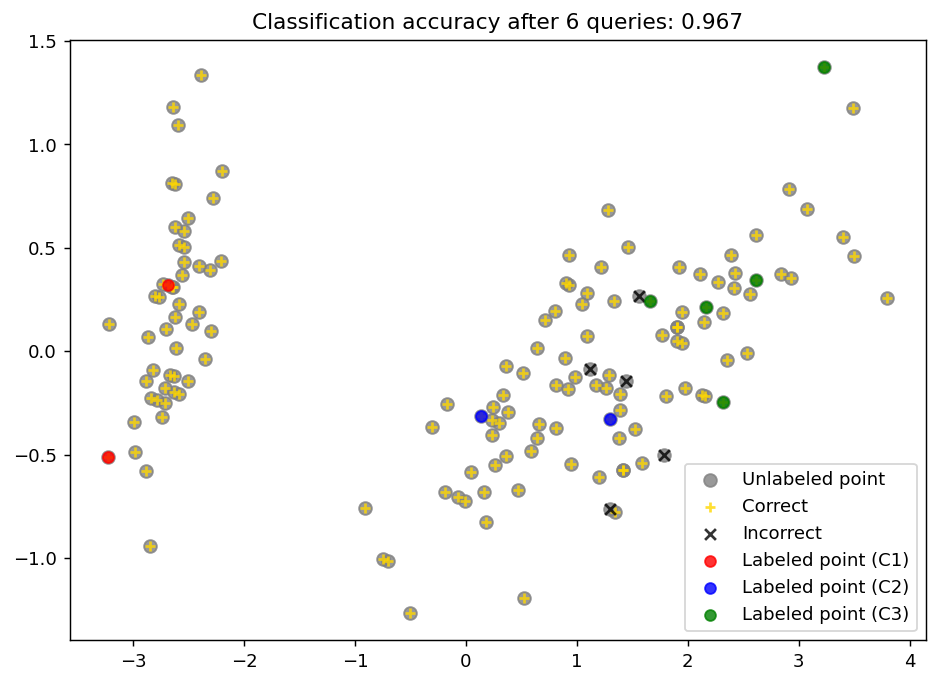

Accuracy after query 6: 0.9667
Predicted probabilities of the 1th instance is[0.56 0.34 0.1 ] with entropy: 0.9217521515075082
Predicted probabilities of the 2th instance is[0.61 0.3  0.09] with entropy: 0.8794277023834652
Predicted probabilities of the 3th instance is[0.605 0.3   0.095] with entropy: 0.8888390147745664
Predicted probabilities of the 4th instance is[0.775 0.165 0.06 ] with entropy: 0.6636447543063713
Predicted probabilities of the 5th instance is[0.865 0.115 0.02 ] with entropy: 0.45241241525320786
The most uncertain point is No. 39


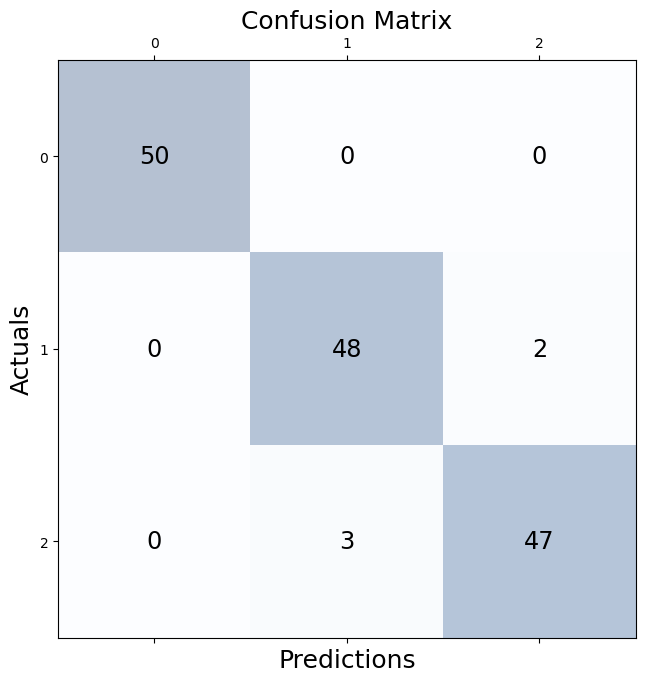

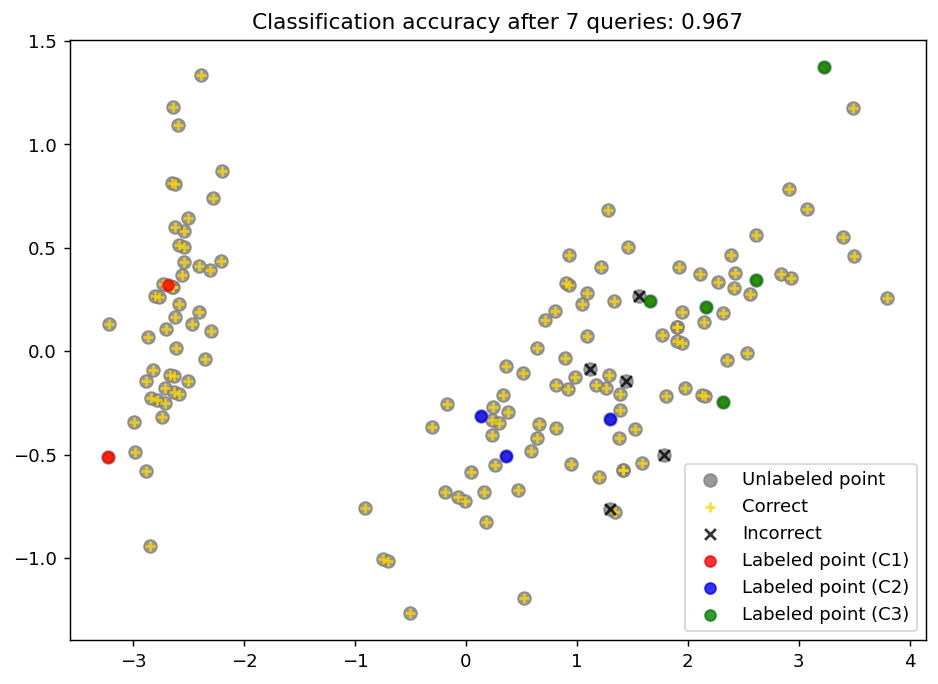

Accuracy after query 7: 0.9667
Predicted probabilities of the 1th instance is[0.775 0.18  0.045] with entropy: 0.6457543860333907
Predicted probabilities of the 2th instance is[0.84  0.125 0.035] with entropy: 0.5237212905238381
Predicted probabilities of the 3th instance is[0.845 0.12  0.035] with entropy: 0.5140796375793502
Predicted probabilities of the 4th instance is[0.875 0.095 0.03 ] with entropy: 0.4456551522673084
Predicted probabilities of the 5th instance is[0.895 0.09  0.015] with entropy: 0.37899442777988446
The most uncertain point is No. 57


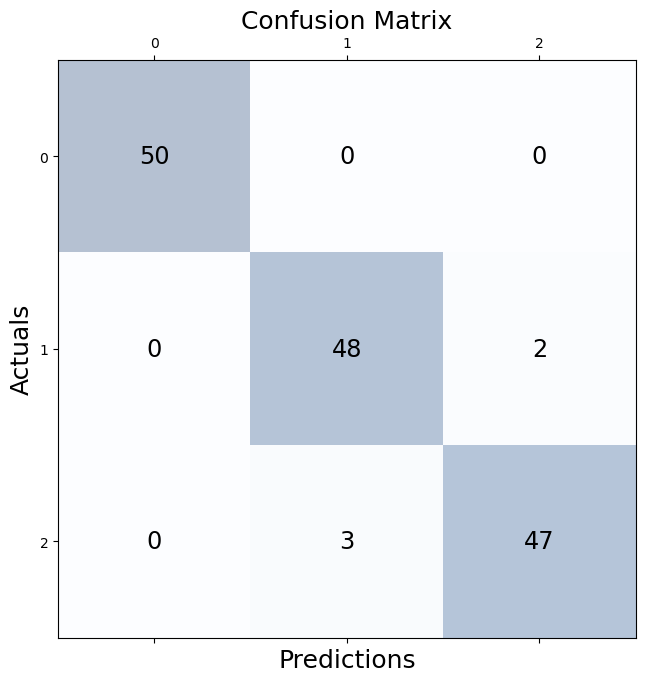

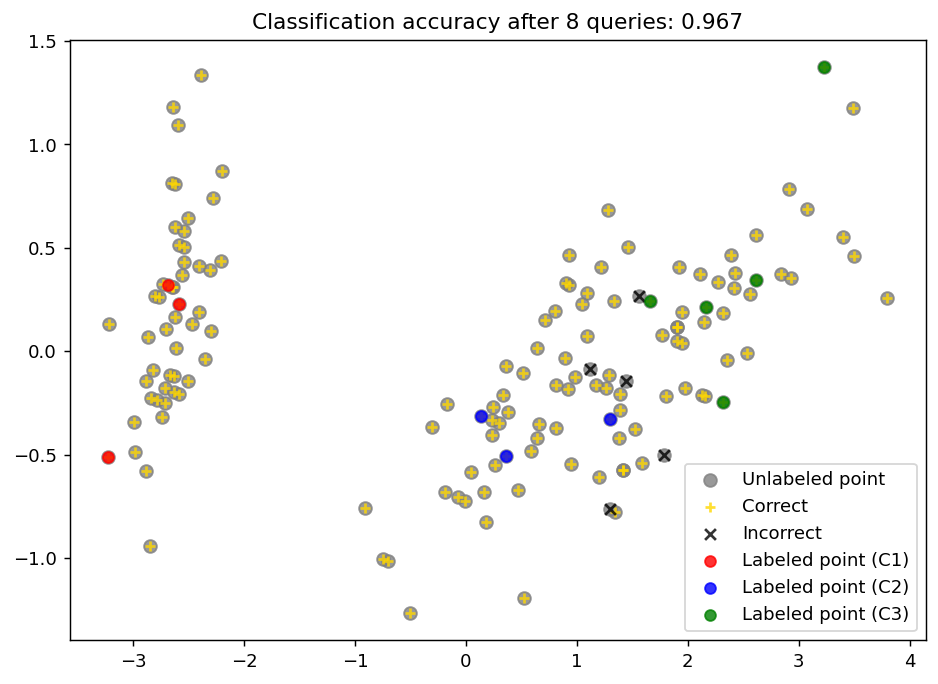

Accuracy after query 8: 0.9667
Predicted probabilities of the 1th instance is[0.775 0.185 0.04 ] with entropy: 0.6384654254292456
Predicted probabilities of the 2th instance is[0.865 0.1   0.035] with entropy: 0.47304005473512284
Predicted probabilities of the 3th instance is[0.865 0.1   0.035] with entropy: 0.47304005473512284
Predicted probabilities of the 4th instance is[0.885 0.11  0.005] with entropy: 0.37741018335078313
Predicted probabilities of the 5th instance is[0.895 0.1   0.005] with entropy: 0.35603384296516183
The most uncertain point is No. 49


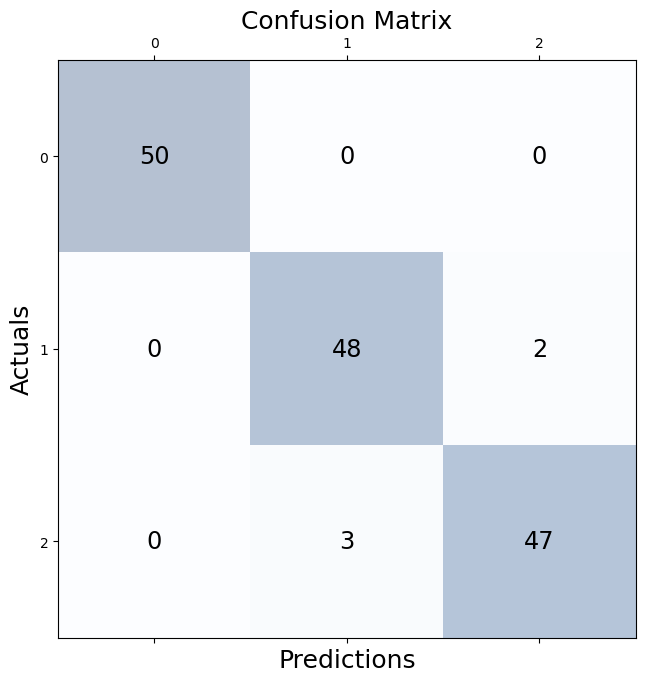

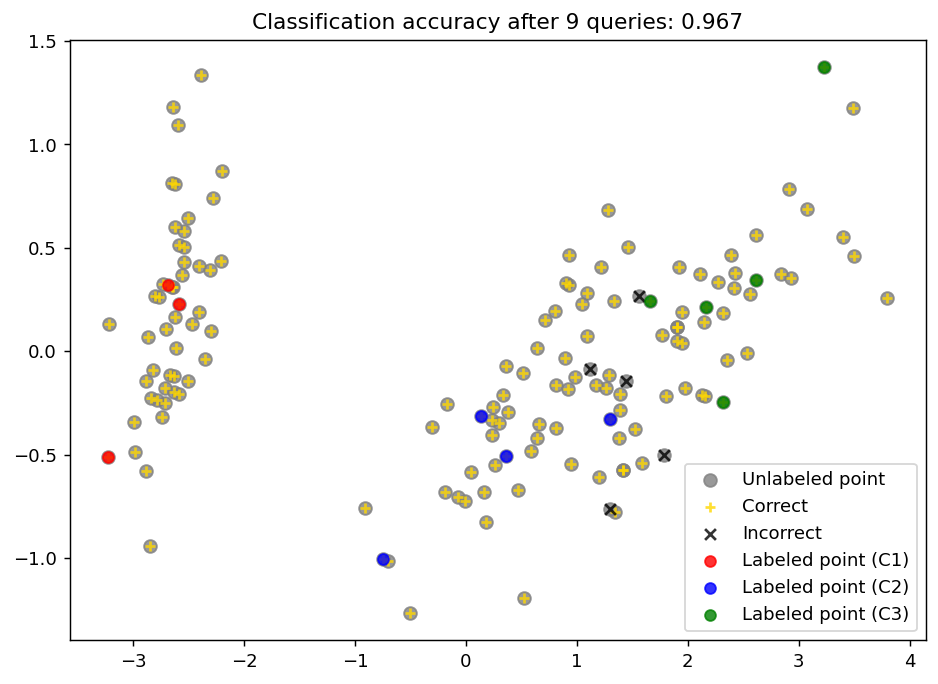

Accuracy after query 9: 0.9667
Predicted probabilities of the 1th instance is[0.77 0.19 0.04] with entropy: 0.6455448306743354
Predicted probabilities of the 2th instance is[0.83 0.14 0.03] with entropy: 0.5351060867107357
Predicted probabilities of the 3th instance is[0.83 0.14 0.03] with entropy: 0.5351060867107357
Predicted probabilities of the 4th instance is[0.875 0.125 0.   ] with entropy: 0.37677016125643675
Predicted probabilities of the 5th instance is[0.895 0.105 0.   ] with entropy: 0.3359322143596015
The most uncertain point is No. 117


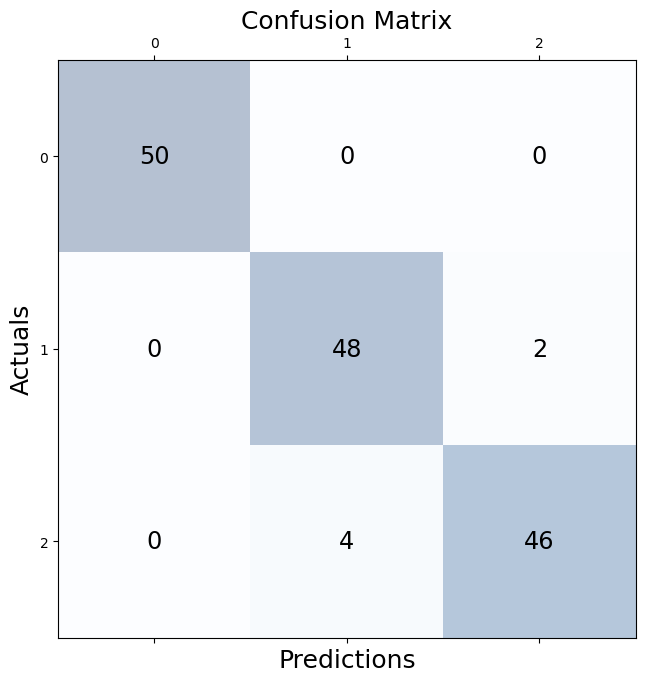

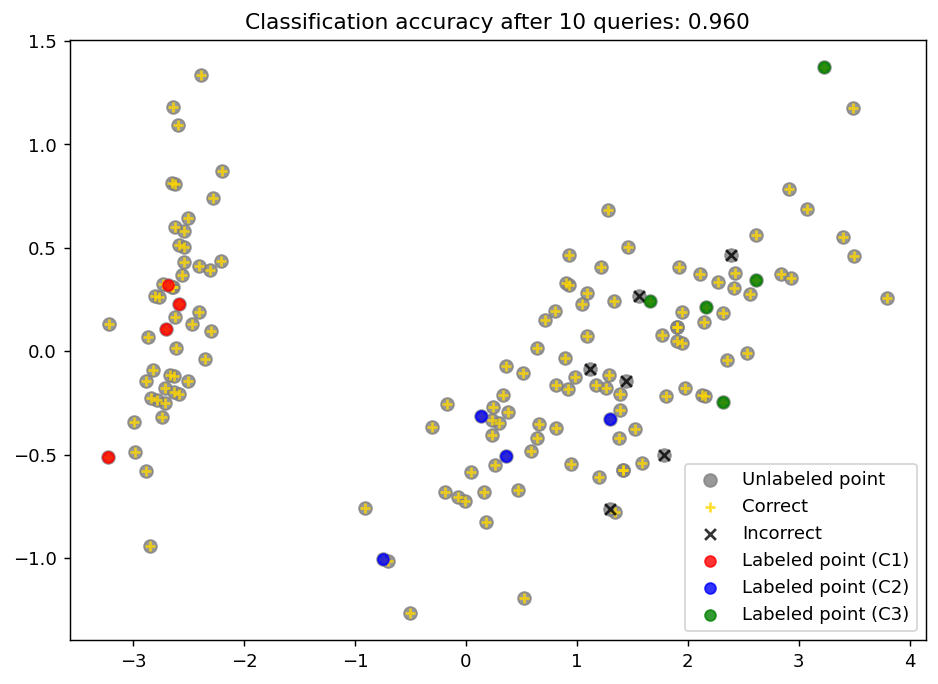

Accuracy after query 10: 0.9600


In [60]:
N_QUERIES = 10
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    # add the new labeled point to the training data
    training_indices=np.append(training_indices,query_index)
    X_train=np.concatenate((X_train,X),axis=0)
    y_train= np.append(y_train,y)
    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
    clf.fit(X_train, y_train) 
    predictions = clf.predict(X_raw) 
    unqueried_score= np.array(accuracy_score(predictions, y_raw))
    predicted_probs = clf.predict_proba(X_pool) 
    entropy_array = entr(predicted_probs).sum(axis=1)
    # print the prediction probabilities and entropies of the first five data points
    for i in range(5):
        print('Predicted probabilities of the ' + str(i+1) + 'th instance is' + str(predicted_probs[i]) + ' with entropy: ' +str(entropy_array[i])) 
    query_index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
    print('The most uncertain point is No.', query_index)    # Calculate and report our model's accuracy.
    conf_matrix=confusion_matrix(y_raw, predictions)
    PlotConfMatrix(conf_matrix, 'Confusion_Matrix', index+1) 

    # Save our model's performance for plotting.
    performance_history.append(unqueried_score)    
    is_correct = (predictions == y_raw)
    
    # Plot our updated classification results once we've trained our learner.
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.scatter(x_component, y_component, color='gray',s=50, alpha=8/10, label='Unlabeled point')
    plt.scatter(x=x_component[is_correct],  y=y_component[is_correct],  color='gold', marker='+', label='Correct',   alpha=8/10)
    plt.scatter(x=x_component[~is_correct], y=y_component[~is_correct], color='black', marker='x', label='Incorrect', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==0]] , y=y_component[training_indices[y_raw[training_indices]==0]], c='red', marker='o', label='Labeled point (C1)', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==1]] , y=y_component[training_indices[y_raw[training_indices]==1]], c='blue', marker='o', label='Labeled point (C2)', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==2]] , y=y_component[training_indices[y_raw[training_indices]==2]], c='green', marker='o', label='Labeled point (C3)', alpha=8/10)
    plt.title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=index+1, final_acc=performance_history[-1]))
    plt.legend(loc='lower right')
    FileName='SelectedPerformance'    
    plt.savefig(FileName + str(index+1)+  '.svg')
    plt.savefig(FileName + str(index+1)+  '.pdf')
    plt.show()
    #print('Accuracy after' + str(index+1) + ' queries:' + str(unqueried_score))
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=unqueried_score))
    #input("Press Enter to continue...")

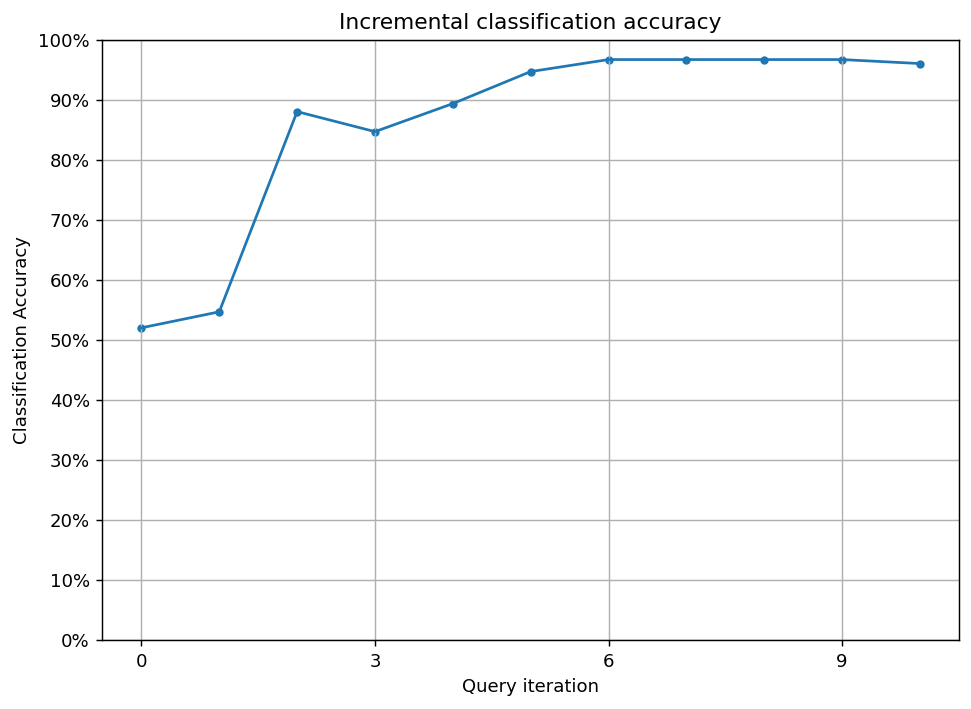

In [61]:
# Plot our performance over time (accuracy vs. number of annotated points)
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.set_ylim(bottom=0, top=1)
ax.grid(True)
ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
plt.savefig('FinalAcc.svg')
plt.savefig('FinalAcc.pdf')
plt.show()